<center> 
    <h1> Toronto Crime </h1>
<h3> Sprint 3</h3>
<h3> Fixied Modelling</h3>
    </center>

##### Author: Arsalan Arif Radhu
##### Date: 21 November 2023

### Table of Contents:
- [Introduction](#intro) <br />
- [Basic Modelling](#bmodel)<br />
- [Basic Feature Engineering](#bfengin)<br />

### Introduction <a id="intro" /> 

After realizing my mistakes I will be doing the changes I refererred to in `MoreModelling` notebook and try to optimize the results as much as possible.

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import numpy as np
from scipy.stats import uniform, randint

In [3]:
# Importing the data
df = pd.read_csv('../Data/FixedFinalDataAdvAn.csv', index_col=0)
df.reset_index(inplace=True)

In [19]:
df.head(10)

,index,OBJECTID,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,LONG_WGS84,...,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
0,0,1,0,2014,1,1,1998,6,1,-79.425896,...,0,0,1,0,0,0,0,0,0,0
1,1,2,0,2014,1,1,2014,1,1,-79.376497,...,0,0,1,0,0,0,0,0,0,0
2,2,3,0,2014,1,1,2014,1,1,-79.344839,...,1,0,0,0,0,0,0,0,1,0
3,3,4,0,2014,1,1,2014,1,1,-79.391841,...,0,0,0,1,0,0,0,0,0,0
4,4,5,0,2014,1,1,2014,1,1,-85.488744,...,0,1,0,0,0,0,0,0,1,0
5,5,6,0,2014,1,1,2014,1,1,-79.416594,...,0,0,0,1,0,0,0,0,0,0
6,6,7,0,2014,1,1,2014,1,1,-79.391279,...,0,0,0,1,0,0,0,0,0,0
7,7,8,0,2014,1,1,2014,1,1,-79.345795,...,0,0,0,1,0,0,0,0,0,0
8,8,9,0,2014,1,1,2014,1,1,-79.132919,...,0,0,0,0,0,0,0,0,0,1
9,9,10,0,2014,1,1,2014,1,1,-79.455586,...,0,0,1,0,0,0,0,0,0,0


As discussed in the previous notebook, I will be dropping all the indices.

In [4]:
df.drop('index', axis=1, inplace= True)
df.drop('OBJECTID', axis=1, inplace= True)

In [5]:
shuffled_df = df.sample(frac=1)

In [22]:
shuffled_df.head(10)

,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,LONG_WGS84,LAT_WGS84,DEATH,...,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
205993,5,2015,10,27,2015,10,14,-79.382692,43.711208,0,...,0,0,0,0,0,1,0,0,0,0
268749,5,2018,6,13,2018,6,13,-79.418034,43.755535,0,...,0,0,0,1,0,0,0,0,0,0
297281,5,2021,5,28,2021,5,18,-79.412312,43.780470,0,...,0,0,0,0,0,0,0,0,1,0
97699,0,2019,8,30,2019,8,30,-79.404001,43.731969,0,...,0,0,0,0,0,0,0,0,1,0
352023,1,2014,1,7,2014,1,7,-79.389898,43.677847,0,...,0,0,0,1,0,0,0,0,0,0
4678,0,2014,5,5,2014,5,5,-79.363523,43.710354,0,...,0,0,0,1,0,0,0,0,0,0
243434,5,2015,5,14,2015,5,8,-79.577961,43.736822,0,...,0,0,0,0,0,1,0,0,0,0
195327,5,2022,6,12,2022,6,11,-79.157727,43.801254,0,...,0,0,0,0,0,0,0,0,1,0
272256,5,2018,10,15,2018,10,12,-79.536260,43.753284,0,...,0,0,0,0,0,0,0,0,1,0
408711,1,2022,1,31,2022,1,31,-79.188816,43.768501,0,...,0,0,0,1,0,0,0,0,0,0


## KNN <a id="knn" /> 

I am going to re-run the KNN model with the shuffled data frame without the `OBJECTID`.

In [49]:
# Extract features and labels
X = shuffled_df.drop('CRIME_TYPE', axis=1)  # Replace 'label_column' with the actual label column name
y = shuffled_df['CRIME_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) 

train_acc = []
test_acc = []

# KNN model

k_range = range(1,40,2)

for k in k_range:
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors (k) as needed

    # Train the model
    knn_classifier.fit(X_train, y_train)
    
    
    # Scores
    
    train_acc.append(knn_classifier.score(X_train, y_train))
    test_acc.append(knn_classifier.score(X_test, y_test)) 
 

Plotting the scores for different K values to see which might be the best K value.

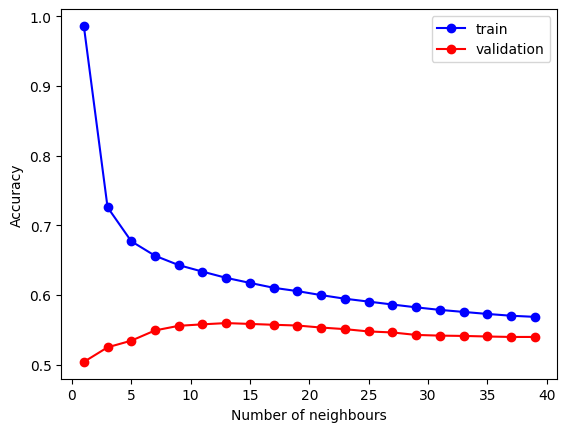

In [50]:
# Visulization
plt.figure()
plt.plot(k_range, train_acc, c = 'blue', label = 'train', marker = 'o')
plt.plot(k_range, test_acc, c = 'red', label = 'validation', marker = 'o')


plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

After plotting we can see that the best K value is 13 with the highest Accuracy. So, I will re-run the model with the best K value to see if there are major imporvements.

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) 


# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=13)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [67]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5597229261699611
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60     31671
           1       0.41      0.20      0.27     12611
           2       0.40      0.01      0.02       243
           3       0.24      0.03      0.05      5226
           4       0.80      0.41      0.54      1150
           5       0.62      0.66      0.64     31965

    accuracy                           0.56     82866
   macro avg       0.50      0.34      0.35     82866
weighted avg       0.53      0.56      0.53     82866



As we can see the accuracy went up to almost 56% which is not a lot but still higher than the base model.

I will try to increase the accuracy by trying to fix the upscaling the data as it is very heavyily loaded with 2 crime types and may be leading to the low accuracy score.

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) 

smote = SMOTE(random_state=10)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [68]:
print("Original class distribution:", pd.Series(y_train).value_counts())
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())

Original class distribution: CRIME_TYPE
5    128319
0    126826
1     49812
3     20945
4      4557
2      1002
Name: count, dtype: int64
Resampled class distribution: CRIME_TYPE
0    128319
5    128319
4    128319
1    128319
3    128319
2    128319
Name: count, dtype: int64


As we can see I have overscaled all the columns and will re-run the model again!


In [69]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=13)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.3920546424347742
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.33      0.42     31671
           1       0.29      0.55      0.38     12611
           2       0.12      0.29      0.17       243
           3       0.13      0.58      0.21      5226
           4       0.50      0.59      0.54      1150
           5       0.71      0.36      0.47     31965

    accuracy                           0.39     82866
   macro avg       0.39      0.45      0.37     82866
weighted avg       0.56      0.39      0.42     82866



As we can observe, there have been improvments in the accuracy of category 3 and 4 but the accuracy of all the other categories took a big hit which has led to the decrement of the overal accuracy to 39% which is worse than base model with best K value.

I will try scaling the oversampled data set to seee if there are any improvements.

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=13)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn_classifier.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5056235367943427
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55     31671
           1       0.35      0.41      0.38     12611
           2       0.35      0.25      0.29       243
           3       0.16      0.26      0.20      5226
           4       0.85      0.90      0.88      1150
           5       0.62      0.54      0.58     31965

    accuracy                           0.51     82866
   macro avg       0.48      0.48      0.48     82866
weighted avg       0.53      0.51      0.51     82866



As we can see there is a huge jump of 11% in overall accuracy of the model, which makes me want to try just scaling without the oversampling to see if it still improves the accuracy by a high percentage.

In [72]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5463278063379432
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.63      0.58     31671
           1       0.39      0.28      0.32     12611
           2       0.46      0.21      0.29       243
           3       0.25      0.05      0.08      5226
           4       0.85      0.95      0.90      1150
           5       0.59      0.64      0.62     31965

    accuracy                           0.55     82866
   macro avg       0.51      0.46      0.46     82866
weighted avg       0.52      0.55      0.53     82866



As we can see only sampling with the best K, under performed by a almost 1.5% but at the same time it improved the precision, recall and f1-score of the categories which were performing poor, so it can be said that this is a better result.

## XGBoost <a id="xgb" /> 

In [6]:
# Extract features and labels
X_boost = shuffled_df.drop('CRIME_TYPE', axis=1)  # Replace 'label_column' with the actual label column name
y_boost = shuffled_df['CRIME_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_boost, y_boost, test_size=0.3, random_state=50)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6282834133822477
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.73      0.66     47356
           1       0.50      0.29      0.36     18917
           2       0.48      0.32      0.39       387
           3       0.57      0.03      0.06      7941
           4       0.86      0.92      0.89      1717
           5       0.67      0.75      0.71     47981

    accuracy                           0.63    124299
   macro avg       0.61      0.51      0.51    124299
weighted avg       0.62      0.63      0.60    124299



In [26]:
# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Pair feature names with their importance s}cores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Print or plot feature importances
print(feature_importance_dict)

{'REPORT_YEAR': 0.0050854157, 'REPORT_MONTH': 0.0038374981, 'REPORT_DAY': 0.016495366, 'OCC_YEAR': 0.006632384, 'OCC_MONTH': 0.0050792904, 'OCC_DAY': 0.01957252, 'LONG_WGS84': 0.006648004, 'LAT_WGS84': 0.0058807284, 'DEATH': 0.0103854295, 'INJURIES': 0.02955502, 'D11': 0.0053145476, 'D12': 0.0031652546, 'D13': 0.0028766408, 'D14': 0.003158494, 'D22': 0.01183429, 'D23': 0.008906449, 'D31': 0.0076689804, 'D32': 0.008107453, 'D33': 0.0064899107, 'D41': 0.0038273816, 'D42': 0.0033103714, 'D43': 0.0031678495, 'D51': 0.0065334085, 'D52': 0.010952516, 'D53': 0.010483871, 'D55': 0.003810799, 'NSA': 0.01079172, 'Apartment': 0.09409077, 'Commercial': 0.024319531, 'Educational': 0.019440755, 'House': 0.081104316, 'NotApplicable': 0.20503007, 'Other': 0.030859375, 'Outside': 0.2510154, 'Transit': 0.074568205}


Creating a visual for easy readability.

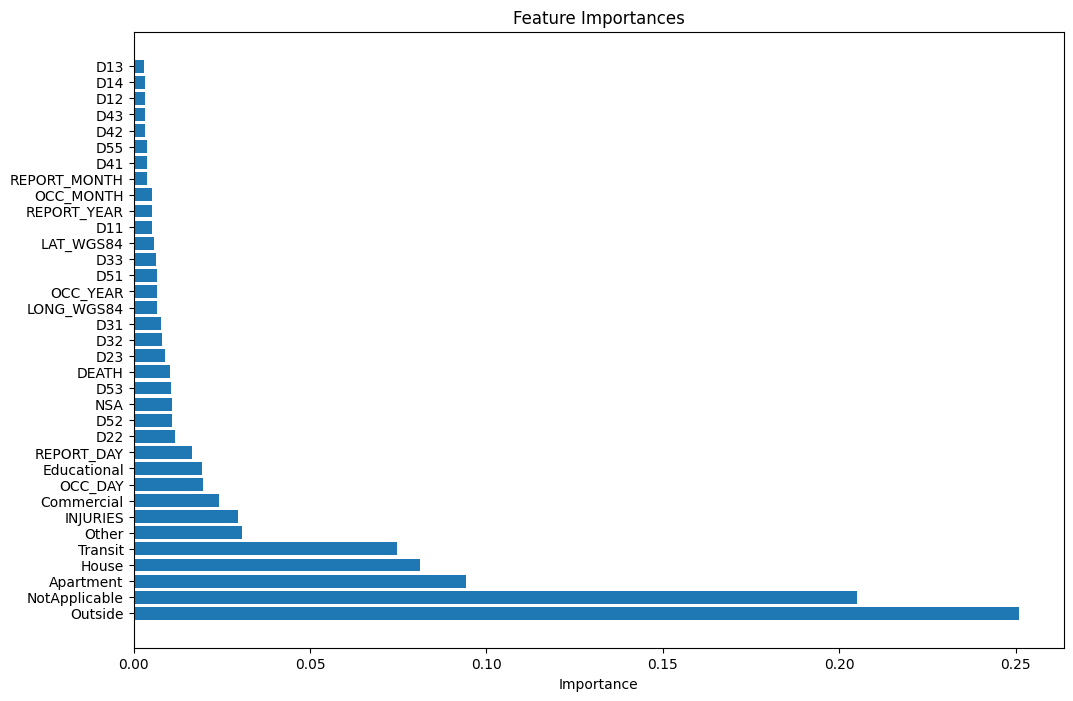

In [27]:
importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

As we can deduce from the graph `Outside`, `NotApplicable` and `Apartment` are the most important features which the model is using for it's prediction.

Trying to find out the approx best combination of parameterss using `RandomSearchCV()`.

In [110]:
param_grid = {
    'learning_rate': uniform(0.01,0.1),
    'max_depth': randint(1,10),
    'min_child_weight': randint(1,10),
    'subsample': uniform(0.01,1.0),
    'colsample_bytree': uniform(0.01,1.0),
    'n_estimators':randint(300,700)
}

xgb = XGBClassifier()
grid_search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='accuracy',n_iter=20)
grid_result = grid_search.fit(X_train, y_train)

best_params = grid_result.best_params_


In [111]:
best_params

{'colsample_bytree': 0.6322807411599023,
 'learning_rate': 0.10184387786008105,
 'max_depth': 8,
 'min_child_weight': 7,
 'n_estimators': 625,
 'subsample': 0.9503656577270551}

As we can see the following are the approx best parameters:<br />
`colsample_bytree`: 0.6322807411599023, ~0.6<br />
 `learning_rate`: 0.10184387786008105, ~0.1<br />
 `max_depth`: 8 <br />
 `min_child_weight`: 7 <br />
 `n_estimators`: 625 <br />
 `subsample`: 0.9503656577270551, ~0.95<br />

Using the above means, I will be trying to find the actual best combination using `GridSearchCV()`

In [8]:
param_grid = {
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [8,9,10],
    'min_child_weight': [6,7,8],
    'n_estimators':[625]
}

xgb = XGBClassifier()
grid_searchG = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid_resultG = grid_searchG.fit(X_train, y_train)

best_params_gSearch = grid_resultG.best_params_

In [9]:
best_params_gSearch

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 8,
 'n_estimators': 625}

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_boost, y_boost, test_size=0.2, random_state=12)

# Set the specified parameters for multi-class classification
num_classes = len(np.unique(y_train))
xgb_params = {
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_child_weight': 8,
    'n_estimators': 625,
    'objective': 'multi:softprob',
    'num_class': num_classes,
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(**xgb_params)  # You can adjust the number of estimators

# Train the model
xgb_model.fit(
    X_train, y_train,
    eval_metric='merror', eval_set=[(X_test, y_test)],
    early_stopping_rounds=10
)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.43298
[1]	validation_0-merror:0.43210
[2]	validation_0-merror:0.42966
[3]	validation_0-merror:0.42800
[4]	validation_0-merror:0.42742
[5]	validation_0-merror:0.42593
[6]	validation_0-merror:0.42658
[7]	validation_0-merror:0.42619
[8]	validation_0-merror:0.42566
[9]	validation_0-merror:0.42476
[10]	validation_0-merror:0.42454
[11]	validation_0-merror:0.42371
[12]	validation_0-merror:0.42361
[13]	validation_0-merror:0.42288
[14]	validation_0-merror:0.42269
[15]	validation_0-merror:0.42227
[16]	validation_0-merror:0.42133
[17]	validation_0-merror:0.42080
[18]	validation_0-merror:0.42026
[19]	validation_0-merror:0.42003
[20]	validation_0-merror:0.41941
[21]	validation_0-merror:0.41852
[22]	validation_0-merror:0.41819
[23]	validation_0-merror:0.41761
[24]	validation_0-merror:0.41700
[25]	validation_0-merror:0.41626
[26]	validation_0-merror:0.41572
[27]	validation_0-merror:0.41472
[28]	validation_0-merror:0.41381
[29]	validation_0-merror:0.41296
[30]	validation_0-me

In [12]:
from sklearn.model_selection import cross_val_score

# Assuming model is your machine learning model
cv_scores = cross_val_score(xgb_model, X_test, y_test, cv=5)  # 5-fold cross-validation
average_cv_accuracy = np.mean(cv_scores)

In [13]:
cv_scores

array([0.61367202, 0.61002836, 0.62010499, 0.61612261, 0.61823448])

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(**xgb_params)  # You can adjust the number of estimators

# Train the model
xgb_model.fit(
    X_train_scaled, y_train,
    eval_metric='merror', eval_set=[(X_test_scaled, y_test)],
    early_stopping_rounds=10 
)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\arifh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.43282
[1]	validation_0-merror:0.43175
[2]	validation_0-merror:0.42957
[3]	validation_0-merror:0.42745
[4]	validation_0-merror:0.42694
[5]	validation_0-merror:0.42622
[6]	validation_0-merror:0.42566
[7]	validation_0-merror:0.42537
[8]	validation_0-merror:0.42536
[9]	validation_0-merror:0.42523
[10]	validation_0-merror:0.42436
[11]	validation_0-merror:0.42399
[12]	validation_0-merror:0.42313
[13]	validation_0-merror:0.42257
[14]	validation_0-merror:0.42204
[15]	validation_0-merror:0.42134
[16]	validation_0-merror:0.42113
[17]	validation_0-merror:0.42062
[18]	validation_0-merror:0.42029
[19]	validation_0-merror:0.42015
[20]	validation_0-merror:0.41934
[21]	validation_0-merror:0.41848
[22]	validation_0-merror:0.41792
[23]	validation_0-merror:0.41730
[24]	validation_0-merror:0.41682
[25]	validation_0-merror:0.41627
[26]	validation_0-merror:0.41559
[27]	validation_0-merror:0.41467
[28]	validation_0-merror:0.41414
[29]	validation_0-merror:0.41334
[30]	validation_0-me

In [17]:
# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6499408683899307
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69     31731
           1       0.52      0.35      0.42     12314
           2       0.45      0.31      0.37       260
           3       0.48      0.07      0.12      5172
           4       0.85      0.91      0.88      1128
           5       0.70      0.75      0.72     32261

    accuracy                           0.65     82866
   macro avg       0.60      0.52      0.53     82866
weighted avg       0.63      0.65      0.63     82866

